# Pandas times Series

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
datetimeindex = pd.date_range(start='2018-02-10', end='2019-01-01', freq='d')
datetimeindex

DatetimeIndex(['2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
               '2018-02-18', '2018-02-19',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=326, freq='D')

In [22]:
df = pd.DataFrame(
    dict(
        n = range(len(datetimeindex)),
        rand = np.random.rand(len(datetimeindex))
    ),
    index=datetimeindex
)
df

,n,rand
2018-02-10,0,0.225745
2018-02-11,1,0.697907
2018-02-12,2,0.516922
2018-02-13,3,0.634748
2018-02-14,4,0.188978
...,...,...
2018-12-28,321,0.860594
2018-12-29,322,0.199525
2018-12-30,323,0.723472
2018-12-31,324,0.788576


In [26]:
df.loc['2018':'2019-01']

,n,rand
2018-02-10,0,0.225745
2018-02-11,1,0.697907
2018-02-12,2,0.516922
2018-02-13,3,0.634748
2018-02-14,4,0.188978
...,...,...
2018-12-28,321,0.860594
2018-12-29,322,0.199525
2018-12-30,323,0.723472
2018-12-31,324,0.788576


### Resampling
- Downsampling
- Upsampling

In [38]:
from helpers import hdisplay

hdisplay([
    df.head(10),
    df.resample('2d').agg({'n': 'max', 'rand': 'sum'}).head(10),
    df.resample('6h').agg({'n': 'max', 'rand': 'sum'}).head(10)
    ])


,n,rand
2018-02-10 00:00:00,0,0.225745
2018-02-11 00:00:00,1,0.697907
2018-02-12 00:00:00,2,0.516922
2018-02-13 00:00:00,3,0.634748
2018-02-14 00:00:00,4,0.188978
2018-02-15 00:00:00,5,0.969900
2018-02-16 00:00:00,6,0.902398
2018-02-17 00:00:00,7,0.382407
2018-02-18 00:00:00,8,0.315067
2018-02-19 00:00:00,9,0.960479


## Test med verklig data

In [51]:
apple = pd.read_csv('../Data/HistoricalData_Apple.csv', parse_dates=['Date'], index_col='Date')
apple.rename(columns={'Close/Last': 'Close'}, inplace=True)
display(apple.head())
apple[["Close", "Open", "High", "Low"]] = apple[["Close", "Open", "High", "Low"]].replace('[\$,]', '', regex=True).astype(float)
apple.info()

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\isaka\AppData\Local\Temp\ipykernel_4772\4264094145.py:4: SyntaxWarning: invalid escape sequence '\$'
  apple[["Close", "Open", "High", "Low"]] = apple[["Close", "Open", "High", "Low"]].replace('[\$,]', '', regex=True).astype(float)


,Close,Volume,Open,High,Low
Date,,,,,
2023-11-09,$182.41,53763540,$182.96,$184.12,$181.81
2023-11-08,$182.89,49340280,$182.35,$183.45,$181.59
2023-11-07,$181.82,70529970,$179.18,$182.44,$178.97
2023-11-06,$179.23,63841310,$176.38,$179.43,$176.21
2023-11-03,$176.65,79829250,$174.24,$176.82,$173.35


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2023-11-09 to 2013-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2517 non-null   float64
 1   Volume  2517 non-null   int64  
 2   Open    2517 non-null   float64
 3   High    2517 non-null   float64
 4   Low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


In [55]:
apple.loc["2018", "Close"].mean()

47.26335657370518

In [64]:
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

apple.resample("Y").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-12-31,19.51,305.95M,19.50,19.65,19.38
2014-12-31,23.07,251.68M,23.05,23.25,22.87
2015-12-31,30.01,206.59M,30.04,30.31,29.72
2016-12-31,26.15,153.07M,26.13,26.36,25.92
2017-12-31,37.64,108.01M,37.61,37.85,37.37
2018-12-31,47.26,135.07M,47.28,47.75,46.80
2019-12-31,52.06,112.24M,51.97,52.46,51.57
2020-12-31,95.35,157.62M,95.27,96.66,93.91
2021-12-31,140.99,90.54M,140.86,142.35,139.47


<Axes: xlabel='Date', ylabel='Open'>

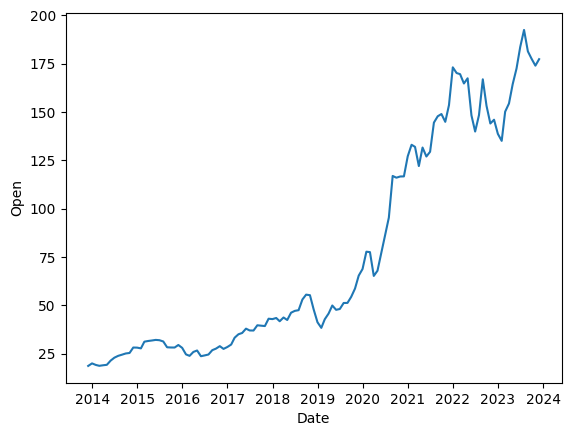

In [68]:
data = apple.resample("M").mean()

sns.lineplot(data=data, x=data.index, y="Open")